In [622]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [623]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [624]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [625]:
def decision_boundary(X, y, mean, std, theta):
    X_prepared = prepare_X((X-mean)/std)
    xs = np.array([min(X_prepared[:,1]) - 0.1, max(X_prepared[:,2]) + 0.1])
    ys = (-1/theta[2]) * (theta[1] * xs + theta[0])
        
    plot_data((X-mean)/std, y)
    plt.plot(xs, ys)

In [626]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_new = (X - mean) / std
    return X_new, mean, std

In [627]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [628]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
#     g = np.copy(z).astype(float)
#     g = np.apply_along_axis(lambda x : 1/(1 + np.exp(-x)),0,g)
    return g

In [629]:
def h(X, theta):
    z = X.dot(theta)
    return sigmoid(z)

In [630]:
def cost(h,y):
    return -y*np.log(h) - (1-y)*np.log(1-h)

In [631]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    J = - np.sum(y*np.log(h(X,theta)) + (1 - y) * np.log(1 - h(X, theta)))/m
    return J

In [632]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot(np.transpose(X), h(X, theta) - y) / m
    
    return d_theta

In [633]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha * derivative_theta(X, y, theta)
        
        J = cost_function(X,y,theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [634]:
def predict(X, mean, std, theta):
    X_normalized = prepare_X(X)
    predictions = h(X_normalized, theta)
    return predictions

In [635]:
# data_columns = ["exam1", "exam2"]
# target_column = "submitted"
# X, y = load_datasets('sats.csv', data_columns, target_column)
# print('Training set: X={}, y={}'.format(X.shape, y.shape))

In [ ]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

In [636]:
plot_data(X, y)

Training set: X=(118, 2), y=(118,)


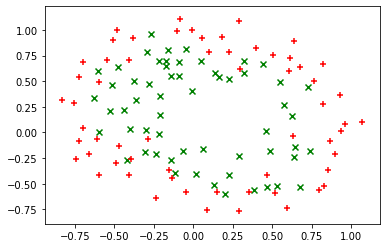

In [637]:
plot_data(X, y)

In [638]:
X_new, mean, std = normalize(X)

In [639]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [640]:
theta = np.zeros((X_new.shape[1], 1))

In [641]:
cost_function(X_new, y_new, theta)

0.6931471805599454

In [642]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000000, False)
print(new_theta, len(Js))

[[-0.03142294]
 [-0.13736903]
 [-0.00440078]] 1028


In [643]:
cost_function(X_new, y_new, new_theta)

0.690262976198276

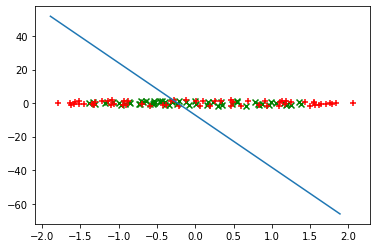

In [644]:
decision_boundary(X, y, mean, std, new_theta)

In [645]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[[0.00332745]
 [0.00019166]]
